# Прогнозирование оттока клиентов банка   
Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.   
Нам нужно построить модель, которая поможет спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Нам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком.

**Ход исследования**

Входные данные — исторические данные о поведении клиентов и расторжении договоров с банком, мы получим из файла `Churn.csv`. О качестве данных ничего не известно. Поэтому перед исследованием понадобится обзор данных.

*Описание данных:*
*Признаки*

- `RowNumber` — индекс строки в данных
- `CustomerId` — уникальный идентификатор клиента
- `Surname` — фамилия
- `CreditScore` — кредитный рейтинг
- `Geography` — страна проживания
- `Gender` — пол
- `Age` — возраст
- `Tenure` — сколько лет человек является клиентом банка
- `Balance` — баланс на счёте
- `NumOfProducts` — количество продуктов банка, используемых клиентом
- `HasCrCard` — наличие кредитной карты
- `IsActiveMember` — активность клиента
- `EstimatedSalary` — предполагаемая зарплата

*Целевой признак*
- `Exited` — факт ухода клиента
 
Подготовка модели пройдёт в пять основных этапов:

1. Обзор данных.
2. Предобработка данных.
3. Исследование задачи.
4. Борьба с дисбалансом.
5. Тестирование моделей и проверка на адекватность.

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Обзор-данных" data-toc-modified-id="Обзор-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Обзор данных</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Исследование задачи</a></span><ul class="toc-item"><li><span><a href="#Подготовка-признаков" data-toc-modified-id="Подготовка-признаков-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Подготовка признаков</a></span><ul class="toc-item"><li><span><a href="#One-hot-Encoding" data-toc-modified-id="One-hot-Encoding-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>One-hot Encoding</a></span></li><li><span><a href="#Разделение-выборки" data-toc-modified-id="Разделение-выборки-3.1.2"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span>Разделение выборки</a></span></li><li><span><a href="#Масштабирование-признаков" data-toc-modified-id="Масштабирование-признаков-3.1.3"><span class="toc-item-num">3.1.3&nbsp;&nbsp;</span>Масштабирование признаков</a></span></li></ul></li><li><span><a href="#Пробное-обучение-моделей-без-учета-дисбаланса-классов" data-toc-modified-id="Пробное-обучение-моделей-без-учета-дисбаланса-классов-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Пробное обучение моделей без учета дисбаланса классов</a></span><ul class="toc-item"><li><span><a href="#Дерево-решений" data-toc-modified-id="Дерево-решений-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Дерево решений</a></span></li><li><span><a href="#Случайный-лес" data-toc-modified-id="Случайный-лес-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>Случайный лес</a></span></li><li><span><a href="#Логистическая-регрессия" data-toc-modified-id="Логистическая-регрессия-3.2.3"><span class="toc-item-num">3.2.3&nbsp;&nbsp;</span>Логистическая регрессия</a></span></li></ul></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#Увеличение-выборки" data-toc-modified-id="Увеличение-выборки-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Увеличение выборки</a></span><ul class="toc-item"><li><span><a href="#Дерево-решений" data-toc-modified-id="Дерево-решений-4.1.1"><span class="toc-item-num">4.1.1&nbsp;&nbsp;</span>Дерево решений</a></span></li><li><span><a href="#Случайный-лес" data-toc-modified-id="Случайный-лес-4.1.2"><span class="toc-item-num">4.1.2&nbsp;&nbsp;</span>Случайный лес</a></span></li><li><span><a href="#Логистическая-регрессия" data-toc-modified-id="Логистическая-регрессия-4.1.3"><span class="toc-item-num">4.1.3&nbsp;&nbsp;</span>Логистическая регрессия</a></span></li></ul></li><li><span><a href="#Уменьшение-выборки" data-toc-modified-id="Уменьшение-выборки-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Уменьшение выборки</a></span><ul class="toc-item"><li><span><a href="#Дерево-решений" data-toc-modified-id="Дерево-решений-4.2.1"><span class="toc-item-num">4.2.1&nbsp;&nbsp;</span>Дерево решений</a></span></li><li><span><a href="#Случайный-лес" data-toc-modified-id="Случайный-лес-4.2.2"><span class="toc-item-num">4.2.2&nbsp;&nbsp;</span>Случайный лес</a></span></li><li><span><a href="#Логистическая-регрессия" data-toc-modified-id="Логистическая-регрессия-4.2.3"><span class="toc-item-num">4.2.3&nbsp;&nbsp;</span>Логистическая регрессия</a></span></li></ul></li><li><span><a href="#Изменение-порога" data-toc-modified-id="Изменение-порога-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Изменение порога</a></span><ul class="toc-item"><li><span><a href="#Дерево-решений" data-toc-modified-id="Дерево-решений-4.3.1"><span class="toc-item-num">4.3.1&nbsp;&nbsp;</span>Дерево решений</a></span></li><li><span><a href="#Случайный-лес" data-toc-modified-id="Случайный-лес-4.3.2"><span class="toc-item-num">4.3.2&nbsp;&nbsp;</span>Случайный лес</a></span></li><li><span><a href="#Логистическая-регрессия" data-toc-modified-id="Логистическая-регрессия-4.3.3"><span class="toc-item-num">4.3.3&nbsp;&nbsp;</span>Логистическая регрессия</a></span></li></ul></li></ul></li><li><span><a href="#Тестирование-модели-и-проверка-на-адекватность" data-toc-modified-id="Тестирование-модели-и-проверка-на-адекватность-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Тестирование модели и проверка на адекватность</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

## Обзор данных   
Загрузим необходимые для нас библиотеки, модели и метрики.

In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-whitegrid')

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import f1_score, roc_auc_score, roc_curve, precision_score, recall_score, r2_score
from sklearn.metrics import precision_recall_curve, accuracy_score, confusion_matrix, mean_squared_error, mean_absolute_error

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.utils import shuffle

pd.options.mode.chained_assignment = None
pd.options.display.float_format = '{:,.2f}'.format

print('Setup complete')

Setup complete


Теперь загрузим и изучим имеющиеся данные.

In [2]:
try:
    df = pd.read_csv('/datasets/Churn.csv')
except:
    df = pd.read_csv('datasets/Churn.csv')
display(df.head(10), df.info(), df.describe().T)
print('Процент пропусков:\n', df.isna().mean()*100)
print()
print('Кол-во дубликатов:', df.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.00,0.00,1,1,1,"101,348.88",1
1,2,15647311,Hill,608,Spain,Female,41,1.00,"83,807.86",1,0,1,"112,542.58",0
2,3,15619304,Onio,502,France,Female,42,8.00,"159,660.80",3,1,0,"113,931.57",1
3,4,15701354,Boni,699,France,Female,39,1.00,0.00,2,0,0,"93,826.63",0
4,5,15737888,Mitchell,850,Spain,Female,43,2.00,"125,510.82",1,1,1,"79,084.10",0
5,6,15574012,Chu,645,Spain,Male,44,8.00,"113,755.78",2,1,0,"149,756.71",1
6,7,15592531,Bartlett,822,France,Male,50,7.00,0.00,2,1,1,"10,062.80",0
7,8,15656148,Obinna,376,Germany,Female,29,4.00,"115,046.74",4,1,0,"119,346.88",1
8,9,15792365,He,501,France,Male,44,4.00,"142,051.07",2,0,1,"74,940.50",0
9,10,15592389,H?,684,France,Male,27,2.00,"134,603.88",1,1,1,"71,725.73",0


None

,count,mean,std,min,25%,50%,75%,max
RowNumber,"10,000.00","5,000.50","2,886.90",1.00,"2,500.75","5,000.50","7,500.25","10,000.00"
CustomerId,"10,000.00","15,690,940.57","71,936.19","15,565,701.00","15,628,528.25","15,690,738.00","15,753,233.75","15,815,690.00"
CreditScore,"10,000.00",650.53,96.65,350.00,584.00,652.00,718.00,850.00
Age,"10,000.00",38.92,10.49,18.00,32.00,37.00,44.00,92.00
Tenure,"9,091.00",5.00,2.89,0.00,2.00,5.00,7.00,10.00
Balance,"10,000.00","76,485.89","62,397.41",0.00,0.00,"97,198.54","127,644.24","250,898.09"
NumOfProducts,"10,000.00",1.53,0.58,1.00,1.00,1.00,2.00,4.00
HasCrCard,"10,000.00",0.71,0.46,0.00,0.00,1.00,1.00,1.00
IsActiveMember,"10,000.00",0.52,0.50,0.00,0.00,1.00,1.00,1.00
EstimatedSalary,"10,000.00","100,090.24","57,510.49",11.58,"51,002.11","100,193.91","149,388.25","199,992.48"


Процент пропусков:
 RowNumber         0.00
CustomerId        0.00
Surname           0.00
CreditScore       0.00
Geography         0.00
Gender            0.00
Age               0.00
Tenure            9.09
Balance           0.00
NumOfProducts     0.00
HasCrCard         0.00
IsActiveMember    0.00
EstimatedSalary   0.00
Exited            0.00
dtype: float64

Кол-во дубликатов: 0


Исходя из первого просмотра данных можно увидеть пропуски в столбце `Tenure` 9,09% и нулевые значения, котрые скорее всего говорят о том, что клиент пользуется улугами компании меньше года. А так же формат данных можно заменить на целочисленный.   
Имеются так же нулевые значения в столбце `Balance`, которые могут говорить как о том, что клиент уже перестал пользоваться улугами банка, так и о том что планирует это сделать.   
Наименования столбцов следовало бы было привести к змеиному регистру.

Посмотрим на распеределение целевого признака в данных.

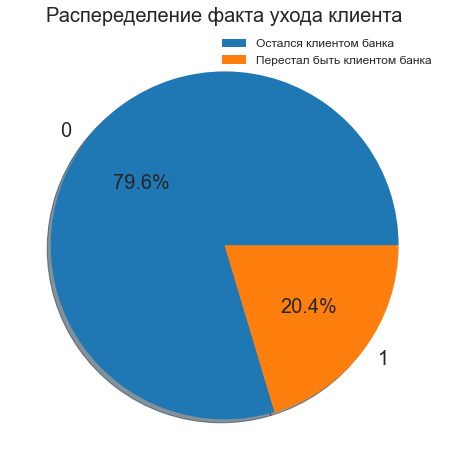

In [3]:
df['Exited'].value_counts().plot(kind='pie', figsize=(8,8), autopct='%1.1f%%', fontsize=20, shadow=True)
plt.legend(['Остался клиентом банка', 'Перестал быть клиентом банка'], fontsize=12)
plt.title('Распеределение факта ухода клиента', fontsize=20)
plt.axis('off');

В выборке представлены клиенты, где у 79.6% - остались с банком, а 20.4% ушли от банка, что говорит нам о том, что данные довольно несбалансированы.   
Посмотрим на распеределение клиентов по странам.

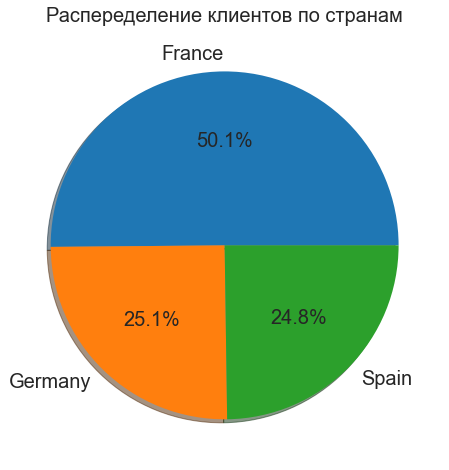

In [4]:
df['Geography'].value_counts().plot(kind='pie', figsize=(8,8), autopct='%1.1f%%', fontsize=20, shadow=True)
plt.title('Распеределение клиентов по странам', fontsize=20)
plt.axis('off');

**Здесь можем сделать первые выводы перед тем как приступить к предобработке данных.**

1. В выборке представлены клиенты, где у 79.6% - остались с банком, а 20.4% ушли от банка, что говорит нам о том, что данные довольно несбалансированы.
2. Пропущенные значения лежат в столбце `Tenure`, который говорит о том, сколько времени клиент пользуется услугами банка. Соответственно данный показатель слишком индивидуальный, а так же, вероятно, имеет вес в нашем дальнейшем обучении моделей, поэтому будет принято решение о том, что данный показатель мы уберём. С точки зрения скорости это самый приемлимый вариант. Заменять значения чем-либо другим не самый лучший вариант.
3. Так же обратим внимание, что клиентами банка являются жители стран Франции (50% в выборке), Германии (25%) и Испании (25%).
4. Признаки в столбцах `RowNumber`, `CustomerId` и `Surname` не несут никакой информации для наших будущих моделей, скорее наоборот. Так что избавимся от них в дальнейшем.
5. Так же заметим, что клиенты банка могут иметь всего 4 продукта от этого банка.
6. Так же в столбце `CreditScore` распределены люди с разным уровнем кредитного рейтинга, но в среднем имеют хорошую оценку.

## Предобработка данных   
Удалим столбцы `RowNumber`, `CustomerId` и `Surname`.

In [5]:
try:
    df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)
except:
    print()
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2.00,0.00,1,1,1,"101,348.88",1
1,608,Spain,Female,41,1.00,"83,807.86",1,0,1,"112,542.58",0
2,502,France,Female,42,8.00,"159,660.80",3,1,0,"113,931.57",1
3,699,France,Female,39,1.00,0.00,2,0,0,"93,826.63",0
4,850,Spain,Female,43,2.00,"125,510.82",1,1,1,"79,084.10",0


Приведем столбцы к змеиному регистру

In [6]:
correct_columns = []
for column in df.columns:
    snake_register = ''
    sep = '_'
    for i in column:
        if i.isupper():
            snake_register += sep + i.lower()
        else:
            snake_register += i
    correct_columns.append(snake_register.lstrip(sep))
df.columns = correct_columns
df.head()

,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
0,619,France,Female,42,2.00,0.00,1,1,1,"101,348.88",1
1,608,Spain,Female,41,1.00,"83,807.86",1,0,1,"112,542.58",0
2,502,France,Female,42,8.00,"159,660.80",3,1,0,"113,931.57",1
3,699,France,Female,39,1.00,0.00,2,0,0,"93,826.63",0
4,850,Spain,Female,43,2.00,"125,510.82",1,1,1,"79,084.10",0


У нас имеются пропуски в столбце `tenure`. Прежде чем принимать решение об удалении столбца или части данных изучим подробнее эти пропуски.

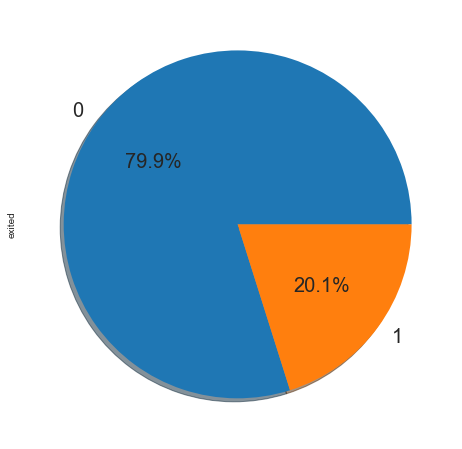

In [7]:
df[df['tenure'].isna()]['exited'].value_counts().plot(kind='pie', figsize=(8,8), autopct='%1.1f%%', fontsize=20, shadow=True);

В данных с пропущенным значением такое же соотношение ушедших и оставшихся клиентов что и во всём датасете.   
Посморим на распределение признаков в случае данных с пропусками и без что бы убедиться, что мы не потеряем важные для нас данные.

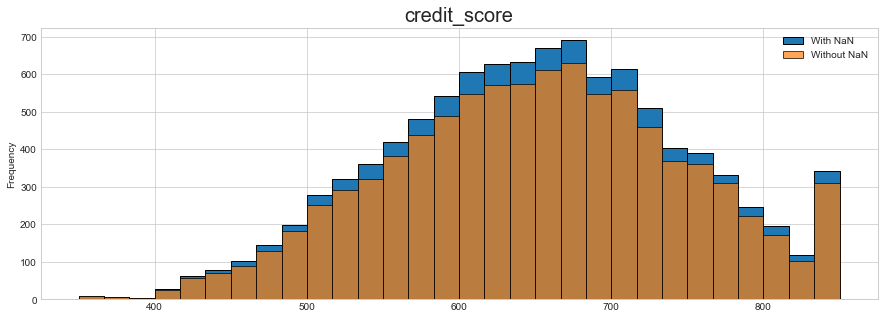

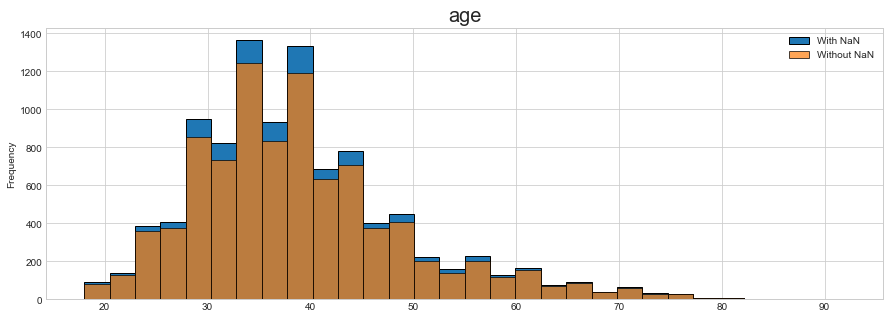

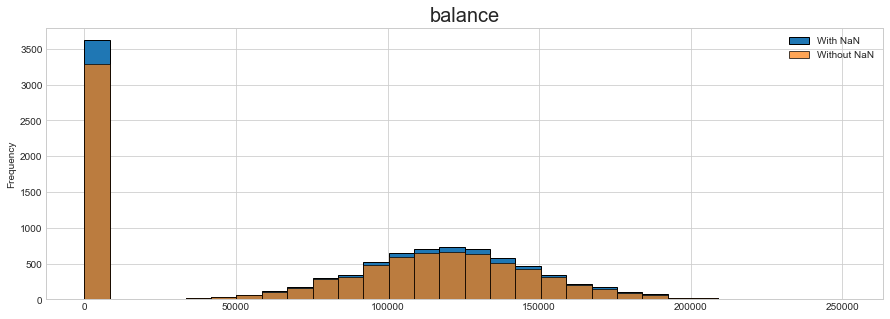

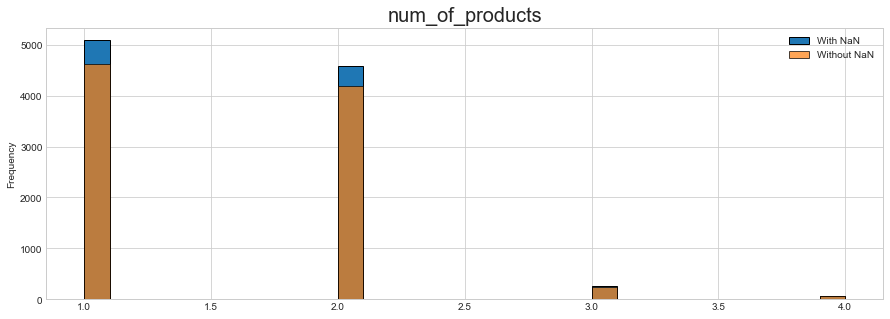

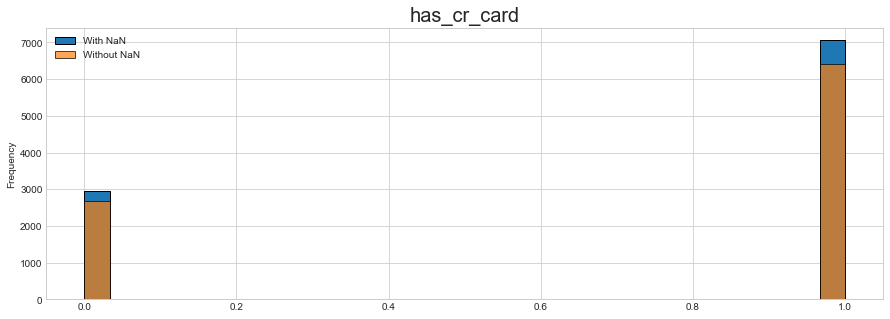

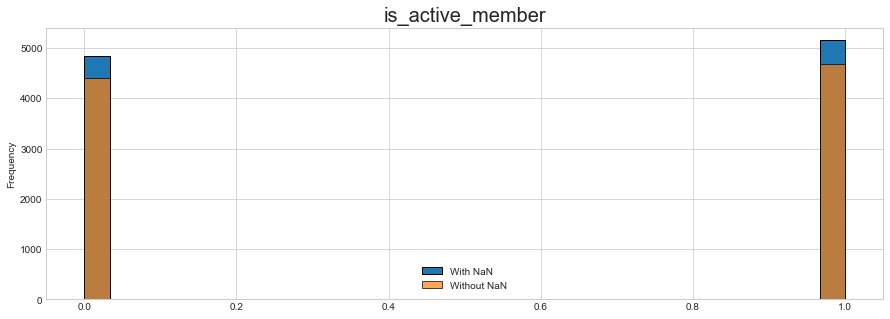

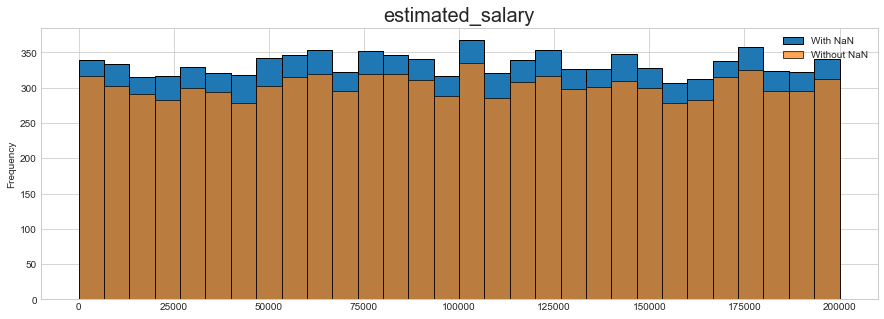

In [8]:
column_list = ['credit_score',
               'age',
               'balance',
               'num_of_products',
               'has_cr_card',
               'is_active_member',
               'estimated_salary']
for column in column_list:
    df[column].plot(kind='hist',
                                                         label='With NaN',
                                                        bins=30,
                                                        figsize=(15,5),
                   ec='black')
    
    df.dropna()[column].plot(kind='hist',
                                                         label='Without NaN',
                                                        bins=30,
                                                        figsize=(15,5),
                                                        alpha=0.7,
                            ec='black')
    
    plt.title(column, fontsize=20)
    plt.legend()
    plt.show()

Здесь можем сделать вывод что в данных с пропущенными занчениями не содержится выбивающихся значений, котрые могли бы значительно повлиять на обучение модели. Удалим строки с пропущенными значениями в столбце `tenure`.

In [9]:
df = df.dropna()

**Вывод:**   
Отток клиентов – это потеря клиентов, выраженное в отсутствии покупок или платежей в течение определенного периода времени. Показатель оттока крайне важен для компаний с подписной и транзакционной моделью бизнеса, подразумевающих регулярные платежи в сторону компании.

Мы предварительно подготовили наш сет данных:

 - пропуски обнаруженые в одном столбце `tenure` - удалили, т.к. заменить на либое другое значение, в том числе и на 0, здесь видится не правильным, потому что нудлевые значения уже присутсвуют. Необходимо уточнить причину появления таких пропусков.
 - удалили стобцы `RowNumber`, `CustomerId`, `Surname`.
 - Привели столбцы к змеиному регистру

Можем приступать к подготовке признаков

## Исследование задачи   
Перед нами стоит задача классификации - необходимо определить - уйдет клиент в ближайшее время или нет. Таким образом, для достижения целей данной задачи предлагаю использовать алгоритмы Логистической регрессии, Случайного леса и Дерева решений.

Для оценки моделей будем использовать F1 меру (F1 score), выберем одну с предельно большим значением. Нам необходимо довести мертику до 0,59 на валидационной выборке.

Для оценки итоговой модели используем ROC кривую с ее площадью (ROC-AUC).

Как мы выяснили, у нас наблюдается дисбаланс классов, правильность (accuracy) нам не подходит

### Подготовка признаков   
Посмотрим на наши данные ещё раз

In [10]:
df.head()

,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
0,619,France,Female,42,2.00,0.00,1,1,1,"101,348.88",1
1,608,Spain,Female,41,1.00,"83,807.86",1,0,1,"112,542.58",0
2,502,France,Female,42,8.00,"159,660.80",3,1,0,"113,931.57",1
3,699,France,Female,39,1.00,0.00,2,0,0,"93,826.63",0
4,850,Spain,Female,43,2.00,"125,510.82",1,1,1,"79,084.10",0


Здесь можно сказать следующее:   
1. Преобразуем категориальные признаки в численные в столбцах `geography` и `gender`
2. Разделим на обучающую, валидационнную и тестовую выборки.
3. Масштабируем признаки с количественными данными

#### One-hot Encoding    
Категориальные признаки `geography` и `gender` необходимо преобразовать в численные с помощью техники прямого кодирования, или отображения (англ. One-Hot Encoding, OHE). Нам нужны количественные признаки для большей точности.

In [11]:
# encoding two features
gender_ohe = pd.get_dummies(df['gender'], drop_first=True)
country_ohe = pd.get_dummies(df['geography'], drop_first=True)

# deleting categorized features
df.drop(['gender', 'geography'], axis=1, inplace=True)

# adding new columns
df_ohe = pd.concat([df, gender_ohe, country_ohe], axis=1)

df_ohe.head()

,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited,Male,Germany,Spain
0,619,42,2.00,0.00,1,1,1,"101,348.88",1,0,0,0
1,608,41,1.00,"83,807.86",1,0,1,"112,542.58",0,0,0,1
2,502,42,8.00,"159,660.80",3,1,0,"113,931.57",1,0,0,0
3,699,39,1.00,0.00,2,0,0,"93,826.63",0,0,0,0
4,850,43,2.00,"125,510.82",1,1,1,"79,084.10",0,0,0,1


#### Разделение выборки   
Мы подготовили наши признаки, осталось только масштабировать числовые, но перед этим разделим наш датасет на обучающую, валидационную и тестовую выборки.

In [12]:
# Creating features
features = df_ohe.drop('exited', axis=1)
# Creating targets
target = df_ohe['exited']
# Selection test sample
features_df, features_test, target_df, target_test = train_test_split(
    features, target, test_size=0.2, random_state=42)
# Selection training and validating samples
features_train, features_valid, target_train, target_valid = train_test_split(
    features_df, target_df, test_size=0.25, random_state=42)

Посмотрим на наши результаты разделения.

In [13]:
print(f'Размер обучающей выборки составляет: {features_train.shape[0]  / len(df):.1%}')
print(f'Размер тестовой выборки составляет: {features_test.shape[0] / len(df):.1%}')
print(f'Размер валидационной выборки составляет: {features_valid.shape[0] / len(df):.1%}')

Размер обучающей выборки составляет: 60.0%
Размер тестовой выборки составляет: 20.0%
Размер валидационной выборки составляет: 20.0%


Проверим так же процент ушедших пользователей в наших выборках, он не должен сильно отличаться от первоначальных 20,4%

In [14]:
print(f'Доля ушедших пользователей в обучающей выборке: {(target_train.sum() / len(target_train)):.1%}')
print(f'Доля ушедших пользователей в тестовой выборке: {(target_test.sum() / len(target_test)):.1%}')
print(f'Доля ушедших пользователей в валидационной выборки: {(target_valid.sum() / len(target_valid)):.1%}')

Доля ушедших пользователей в обучающей выборке: 20.3%
Доля ушедших пользователей в тестовой выборке: 20.6%
Доля ушедших пользователей в валидационной выборки: 20.4%


Выборки разделены правильно

#### Масштабирование признаков   
Наши количественные признаки имеют различный разброс значений. Мы используем один из методов масштабирования - стандартизацию данных методом `StandardScaler`. Обучим на обучающей выборке.

In [15]:
# Select columns with numeric data
numeric = ['credit_score', 'age', 'balance', 'estimated_salary']
scaler = StandardScaler()
# Train scaler on training sample
scaler.fit(features_train[numeric])
# Replace numeric data to scaled one
features_train[numeric] = scaler.transform(features_train[numeric])
features_train.head()

,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,Male,Germany,Spain
4440,0.65,-0.65,9.00,0.38,1,1,0,1.14,1,0,0
6866,0.27,-0.65,8.00,1.94,1,1,1,-0.82,1,0,1
9257,0.30,-0.18,8.00,1.16,2,1,1,-1.36,0,1,0
3223,1.32,0.01,2.00,0.44,1,0,0,-0.35,1,0,1
1085,1.61,0.30,5.00,-1.25,1,1,0,1.68,1,0,0


Выглядит не плохо. Масштабируем таже признаки в вылидационной и тестовой выборках.

In [16]:
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

Теперь можно приступать к обучению моделей без учёта дисбаланса.

### Пробное обучение моделей без учета дисбаланса классов   
Изучим три известные нам на данный момент модели и обучим их:   
1. Дерево решений
2. Случайный лес
3. Логистическая регрессия

#### Дерево решений   
Обучим первую модель случайного леса и посмотрим значение F1 score

In [17]:
best_dtc_model = None
best_result = 0
best_depth = 0
for depth in range(1, 20):
    model = DecisionTreeClassifier(random_state=42, max_depth=depth)
    model.fit(features_train, target_train)
    predictions_valid = model.predict(features_valid)
    result = f1_score(target_valid, predictions_valid)
    if result > best_result:
        best_dtc_model = model
        best_result = result
        best_depth = depth
        
print("F1 score наилучшей модели на валидационной выборке:", best_result, "Глубина дерева:", best_depth)

F1 score наилучшей модели на валидационной выборке: 0.5750798722044729 Глубина дерева: 8


Посмотрим так же показатели метрики AUC-ROC

In [18]:
def auc_roc_score(models):
    '''Function returns roc_auc_score of features_valid
    and on the enter waits a model.
    E.g.
    auc_roc_score(DecisionTreeClassifier(random_state=42, max_depth=8))
    '''
    probabilities_valid = models.predict_proba(features_valid)
    probabilities_one_valid = probabilities_valid[:, 1]
    return print('AUC-ROC наилучшей модели на валидационной выборке:', roc_auc_score(target_valid, probabilities_one_valid))

auc_roc_score(best_dtc_model)

AUC-ROC наилучшей модели на валидационной выборке: 0.7893252514264105


Не очень хороший результат тоже результат, но мы уже близки к требуемому значению в 0.59. Не смотря на то что требуемое значение метрики F1 не достингнуто, модель всё же предсказывает лучше случайной: значение AUC ROC = 0.789, что больше 0.5. Пока что продолжим предварительно обучать следующие модели.

#### Случайный лес   
Обучим модель случайного леса и посмотрим на скоринг.

In [19]:
best_rfc_model = None
best_result = 0
best_est = 0
best_depth = 0
for est in range(10, 111, 10):
    for depth in range (1, 30):
        model = RandomForestClassifier(random_state=42, n_estimators=est, max_depth=depth)
        model.fit(features_train, target_train)
        predictions_valid = model.predict(features_valid)
        result = f1_score(target_valid, predictions_valid)
        if result > best_result:
            best_rfc_model = model
            best_result = result
            best_est = est
            best_depth = depth

print("F1 score наилучшей модели на валидационной выборке:", best_result, "Количество деревьев:", best_est, "Максимальная глубина:", best_depth)


F1 score наилучшей модели на валидационной выборке: 0.6061588330632092 Количество деревьев: 50 Максимальная глубина: 12


Посмотрим так же показатели метрики AUC-ROC

In [20]:
auc_roc_score(best_rfc_model)

AUC-ROC наилучшей модели на валидационной выборке: 0.8662834342640318


Уже выше требуемого показателя в 0.59 и AUC-ROC показывает достаточно не плохое значение. Но и дисбаланс мы не трогали пока что.

#### Логистическая регрессия   
Обучим модель логистической регрессии и посмотрим на скоринг

In [21]:
model_lr = LogisticRegression(random_state=42, solver='liblinear')
model_lr.fit(features_train, target_train)

predictions_valid = model_lr.predict(features_valid)
valid_f1 = f1_score(target_valid, predictions_valid)

print("F1 score модели логистической регрессии на валидационной выборке:", valid_f1)

F1 score модели логистической регрессии на валидационной выборке: 0.34932821497120925


Достаточно плохой показатель. Попробуем указать `class_weight='balanced'`

In [22]:
model_lr = LogisticRegression(random_state=42, solver='liblinear', class_weight='balanced')
model_lr.fit(features_train, target_train)

predictions_valid = model_lr.predict(features_valid)
valid_f1 = f1_score(target_valid, predictions_valid)

print("F1 score модели логистической регрессии на валидационной выборке:", valid_f1)

F1 score модели логистической регрессии на валидационной выборке: 0.4847908745247149


Посмотрим так же показатели метрики AUC-ROC

In [23]:
auc_roc_score(model_lr)

AUC-ROC наилучшей модели на валидационной выборке: 0.7737860840441326


Уже лучше, но не достаточно. Хоть и заметно лучше случайной модели. Видимо здесь без устранения дисбаланса никак.   

### Вывод   
Мы подготовили все признаки для обучения моделей, категориальные заменили на числовые значения, а колличественные масштабировали методом стандартизации.   
Мы провели подбор и обучение моделей, без учёта дисбаланса, Дерева решений, Случайного леса и Логистической регрессии. Результаты довольно плохие, самый лучший результат, который выше 0.59, показал Случайный лес с параметрами: *Количество деревьев: 50 Максимальная глубина: 12*

## Борьба с дисбалансом
Классы не представлены одинаково в нашей задаче, посмотрим еще раз:

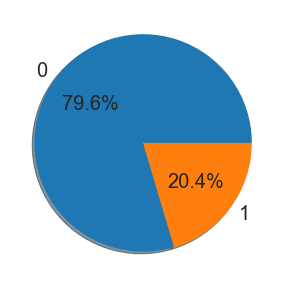

In [24]:
df['exited'].value_counts().plot(kind='pie', figsize=(5,5), autopct='%1.1f%%', fontsize=20, shadow=True)
plt.axis('off');

Будем пробовать решить эту проблему тремя способами:
1. Увеличение выборки
2. Уменьшение выборки
3. Изменение порога

### Увеличение выборки
Напишем функцию для увеличении выборки и применим её к нашей обучающей выборке.
- разделим обучающую выборку на отрицательные и положительные объекты
- скопируем несколько раз положительные объекты
- с учётом полученных данных создадим новую обучающую выборку
- перемешаем данные

In [25]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=42)
    
    return features_upsampled, target_upsampled

features_upsampled, target_upsampled = upsample(features_train, target_train, 4)

print(features_upsampled.shape)
target_upsampled.value_counts(normalize=True)

(8781, 11)


1   0.51
0   0.49
Name: exited, dtype: float64

Теперь обучающая выборка сбалансирована. Значения практически 50/50.   
Наши лучшие модели были сохранены в переменных, вспомним их:   
 - Дерево решений - `best_dtc_model`
 - Случайный лес - `best_rfc_model`
 - Логистическая регрессия - `model_lr` 
 
Используем их по очереди и сравним результаты до и после увеличения выборки.

#### Дерево решений  

In [26]:
best_dtc_model.fit(features_upsampled, target_upsampled)
predicted_valid = best_dtc_model.predict(features_valid)

print("F1:", f1_score(target_valid, predicted_valid))

F1: 0.5739130434782609


Правктически такое же значение на выборке с дисбалансом, даже немного хуже. Попробуем указать `class_weight='balanced'`

In [27]:
model = DecisionTreeClassifier(random_state=42, max_depth=8, class_weight='balanced')
model.fit(features_upsampled, target_upsampled)
predicted_valid = model.predict(features_valid)

print("F1:", f1_score(target_valid, predicted_valid))

F1: 0.582608695652174


Посмотрим так же показатели метрики AUC-ROC

In [28]:
auc_roc_score(model)

AUC-ROC наилучшей модели на валидационной выборке: 0.8116988955679285


Теперь уже немного лучше, но до 0.59 всё так же не дотягивает. AUC-ROC так же показывает рост.

#### Случайный лес

In [29]:
model = RandomForestClassifier(random_state=42, n_estimators=50, max_depth=12)
model.fit(features_upsampled, target_upsampled)
predicted_valid = model.predict(features_valid)

print("F1:", f1_score(target_valid, predicted_valid))

F1: 0.6258148631029987


Посмотрим так же показатели метрики AUC-ROC

In [30]:
auc_roc_score(model)

AUC-ROC наилучшей модели на валидационной выборке: 0.8607845584413891


Значение улучшилось по сравнению с первоначальной выборкой. А вот AUC-ROC наоборот незначительно уменьшился.

#### Логистическая регрессия

In [31]:
model_lr.fit(features_upsampled, target_upsampled)
predicted_valid = model_lr.predict(features_valid)

print("F1:", f1_score(target_valid, predicted_valid))

F1: 0.48387096774193544


Посмотрим так же показатели метрики AUC-ROC

In [32]:
auc_roc_score(model_lr)

AUC-ROC наилучшей модели на валидационной выборке: 0.7737674564160071


В данном случае увеличение выборки не дала желаемого результата логистической регрессии. AUC-ROC остался без изменений.

### Уменьшение выборки   
Напишем функцию для уменьшения выборки и применим её к нашей обучающей выборке.   

- разделим обучающую выборку на отрицательные и положительные объекты
- случайным образом отбросим часть из нулевых объектов
- с учётом полученных данных создадим новую обучающую выборку
- перемешаем данные

In [33]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=42)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=42)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=42)
    
    return features_downsampled, target_downsampled

features_downsampled, target_downsampled = downsample(features_train, target_train, 0.255)

print(features_downsampled.shape)
target_downsampled.value_counts(normalize=True)

(2217, 11)


1   0.50
0   0.50
Name: exited, dtype: float64

Теперь обучающая выборка сбалансирована. Значения ровно 50/50.   
Проверим наши модели.

#### Дерево решений

In [34]:
model = DecisionTreeClassifier(random_state=42, max_depth=8, class_weight='balanced')
model.fit(features_downsampled, target_downsampled)
predicted_valid = model.predict(features_valid)

print("F1:", f1_score(target_valid, predicted_valid))

F1: 0.5260058881256134


Посмотрим так же показатели метрики AUC-ROC

In [35]:
auc_roc_score(model)

AUC-ROC наилучшей модели на валидационной выборке: 0.7804734025411811


Значение F1 и AUC-ROC получилось несколько ниже предыдущих вариантов.

#### Случайный лес

In [36]:
model = RandomForestClassifier(random_state=42, n_estimators=50, max_depth=12)
model.fit(features_downsampled, target_downsampled)
predicted_valid = model.predict(features_valid)

print("F1:", f1_score(target_valid, predicted_valid))

F1: 0.5681581685744016


Посмотрим так же показатели метрики AUC-ROC

In [37]:
auc_roc_score(model)

AUC-ROC наилучшей модели на валидационной выборке: 0.8515974122499008


Здесь мы так же имеем снижение значения F1-score и AUC-ROC.

#### Логистическая регрессия

In [38]:
model_lr.fit(features_downsampled, target_downsampled)
predicted_valid = model_lr.predict(features_valid)

print("F1:", f1_score(target_valid, predicted_valid))

F1: 0.4924242424242424


Посмотрим так же показатели метрики AUC-ROC

In [39]:
auc_roc_score(model_lr)

AUC-ROC наилучшей модели на валидационной выборке: 0.7759152219388753


А вот логистическая регрессия показала результат немного лучше, но всё так же далеко от целевого показателя в 0.59. AUC-ROC так же не значительно увеличился.

### Изменение порога   
Для удобства близость к классам переведём в вероятность классов (у нас два класса - 0 и 1). Нам достаточно вероятности класса «1». По умолчанию он равен 0.5 - попробуем разные параметры, например, до 0.95

#### Дерево решений

Порог = 0.00 | Точность = 0.200, Полнота = 0.906 | F1-мера = 0.327
Порог = 0.05 | Точность = 0.309, Полнота = 0.852 | F1-мера = 0.453
Порог = 0.10 | Точность = 0.396, Полнота = 0.768 | F1-мера = 0.523
Порог = 0.15 | Точность = 0.417, Полнота = 0.749 | F1-мера = 0.536
Порог = 0.20 | Точность = 0.464, Полнота = 0.695 | F1-мера = 0.557
Порог = 0.25 | Точность = 0.591, Полнота = 0.628 | F1-мера = 0.609
Порог = 0.30 | Точность = 0.591, Полнота = 0.628 | F1-мера = 0.609
Порог = 0.35 | Точность = 0.603, Полнота = 0.609 | F1-мера = 0.606
Порог = 0.40 | Точность = 0.662, Полнота = 0.550 | F1-мера = 0.601
Порог = 0.45 | Точность = 0.701, Полнота = 0.493 | F1-мера = 0.579
Порог = 0.50 | Точность = 0.706, Полнота = 0.485 | F1-мера = 0.575
Порог = 0.55 | Точность = 0.716, Полнота = 0.447 | F1-мера = 0.551
Порог = 0.60 | Точность = 0.720, Полнота = 0.415 | F1-мера = 0.526
Порог = 0.65 | Точность = 0.720, Полнота = 0.415 | F1-мера = 0.526
Порог = 0.70 | Точность = 0.704, Полнота = 0.372 | F1-мера = 0

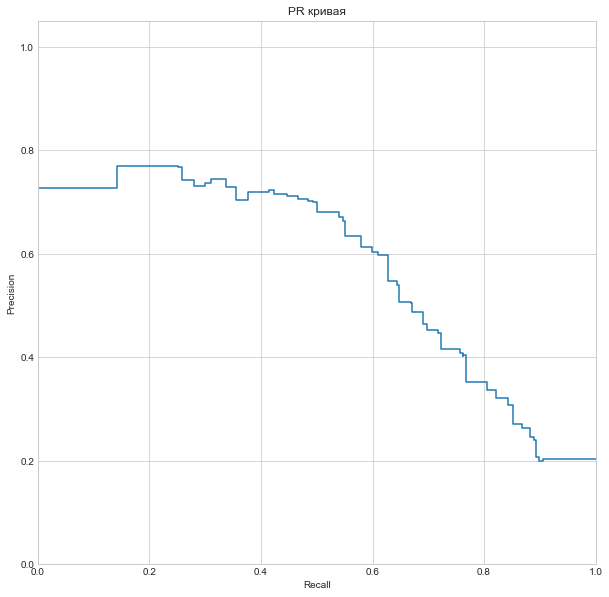

In [40]:
model = DecisionTreeClassifier(random_state=42, max_depth=8)
model.fit(features_train, target_train)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

for threshold in np.arange(0, 0.95, 0.05):
    predicted_valid = probabilities_one_valid > threshold
    precision = precision_score(target_valid, predicted_valid)
    recall = recall_score(target_valid, predicted_valid)
    f1 = f1_score(target_valid, predicted_valid)
    print("Порог = {:.2f} | Точность = {:.3f}, Полнота = {:.3f} | F1-мера = {:.3f}".format(
        threshold, precision, recall, f1))
    
precision, recall, thresholds = precision_recall_curve(target_valid, probabilities_valid[:, 1])    
plt.figure(figsize=(10, 10))
plt.step(recall, precision, where='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('PR кривая')
plt.show() 

Для порога 0 полнота равна 0.906 - почти все ответы положительные. Самый высокий показатель F1 наблюдаем с порогом 0.3

#### Случайный лес

Порог = 0.00 | Точность = 0.204, Полнота = 1.000 | F1-мера = 0.339
Порог = 0.05 | Точность = 0.264, Полнота = 0.973 | F1-мера = 0.416
Порог = 0.10 | Точность = 0.333, Полнота = 0.927 | F1-мера = 0.490
Порог = 0.15 | Точность = 0.404, Полнота = 0.852 | F1-мера = 0.548
Порог = 0.20 | Точность = 0.475, Полнота = 0.803 | F1-мера = 0.597
Порог = 0.25 | Точность = 0.533, Полнота = 0.722 | F1-мера = 0.613
Порог = 0.30 | Точность = 0.586, Полнота = 0.682 | F1-мера = 0.630
Порог = 0.35 | Точность = 0.627, Полнота = 0.617 | F1-мера = 0.622
Порог = 0.40 | Точность = 0.673, Полнота = 0.577 | F1-мера = 0.621
Порог = 0.45 | Точность = 0.725, Полнота = 0.547 | F1-мера = 0.624
Порог = 0.50 | Точность = 0.760, Полнота = 0.504 | F1-мера = 0.606
Порог = 0.55 | Точность = 0.786, Полнота = 0.426 | F1-мера = 0.552
Порог = 0.60 | Точность = 0.796, Полнота = 0.388 | F1-мера = 0.522
Порог = 0.65 | Точность = 0.812, Полнота = 0.337 | F1-мера = 0.476
Порог = 0.70 | Точность = 0.858, Полнота = 0.294 | F1-мера = 0

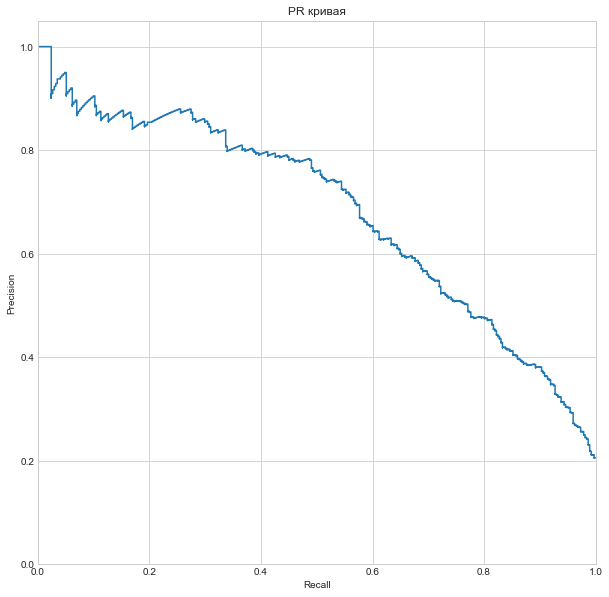

In [41]:
model = RandomForestClassifier(random_state=42, n_estimators=50, max_depth=12)
model.fit(features_train, target_train)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

for threshold in np.arange(0, 0.95, 0.05):
    predicted_valid = probabilities_one_valid > threshold
    precision = precision_score(target_valid, predicted_valid)
    recall = recall_score(target_valid, predicted_valid)
    f1 = f1_score(target_valid, predicted_valid)
    print("Порог = {:.2f} | Точность = {:.3f}, Полнота = {:.3f} | F1-мера = {:.3f}".format(
        threshold, precision, recall, f1))
    
precision, recall, thresholds = precision_recall_curve(target_valid, probabilities_valid[:, 1])    
plt.figure(figsize=(10, 10))
plt.step(recall, precision, where='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('PR кривая')
plt.show() 

Здесь мы так же наблюдаем самый высокий показатель F1 в 0.63 с порогом 0.3.

#### Логистическая регрессия

Порог = 0.00 | Точность = 0.204, Полнота = 1.000 | F1-мера = 0.339
Порог = 0.05 | Точность = 0.228, Полнота = 0.989 | F1-мера = 0.370
Порог = 0.10 | Точность = 0.268, Полнота = 0.895 | F1-мера = 0.413
Порог = 0.15 | Точность = 0.323, Полнота = 0.817 | F1-мера = 0.463
Порог = 0.20 | Точность = 0.372, Полнота = 0.712 | F1-мера = 0.489
Порог = 0.25 | Точность = 0.419, Полнота = 0.609 | F1-мера = 0.497
Порог = 0.30 | Точность = 0.452, Полнота = 0.512 | F1-мера = 0.480
Порог = 0.35 | Точность = 0.505, Полнота = 0.442 | F1-мера = 0.471
Порог = 0.40 | Точность = 0.551, Полнота = 0.367 | F1-мера = 0.440
Порог = 0.45 | Точность = 0.580, Полнота = 0.313 | F1-мера = 0.406
Порог = 0.50 | Точность = 0.607, Полнота = 0.245 | F1-мера = 0.349
Порог = 0.55 | Точность = 0.670, Полнота = 0.181 | F1-мера = 0.285
Порог = 0.60 | Точность = 0.694, Полнота = 0.135 | F1-мера = 0.226
Порог = 0.65 | Точность = 0.702, Полнота = 0.089 | F1-мера = 0.158
Порог = 0.70 | Точность = 0.667, Полнота = 0.054 | F1-мера = 0

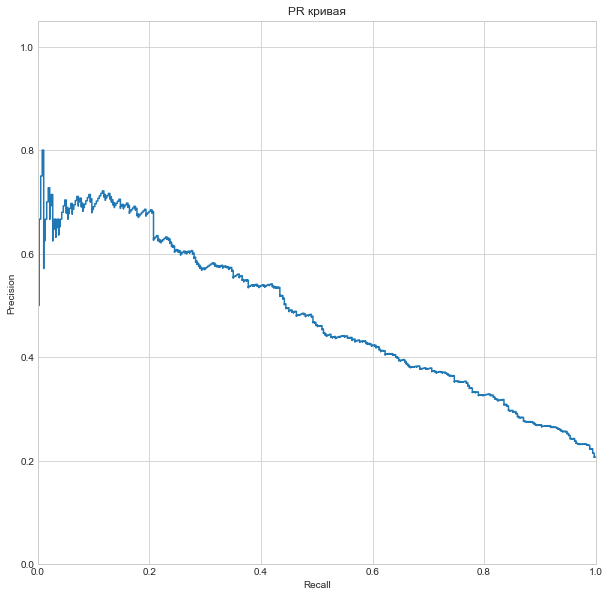

In [42]:
model = LogisticRegression(random_state=42, solver='liblinear')
model.fit(features_train, target_train)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

for threshold in np.arange(0, 0.95, 0.05):
    predicted_valid = probabilities_one_valid > threshold
    precision = precision_score(target_valid, predicted_valid)
    recall = recall_score(target_valid, predicted_valid)
    f1 = f1_score(target_valid, predicted_valid)
    print("Порог = {:.2f} | Точность = {:.3f}, Полнота = {:.3f} | F1-мера = {:.3f}".format(
        threshold, precision, recall, f1))
    
precision, recall, thresholds = precision_recall_curve(target_valid, probabilities_valid[:, 1])    
plt.figure(figsize=(10, 10))
plt.step(recall, precision, where='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('PR кривая')
plt.show() 

Для порога 0 полнота равна 1 - все ответы положительные. При пороге 0.9 модель перестает давать правильные ответы. Самый высокий показатель F1 наблюдаем с порогом 0.25

**Вывод**   
Мы опробовали три варианта борьбы с дисбалансом: Увеличение выборки, Уменьшение выборки и Изменение порога. Самым эффективным оказался вариант с увеличеним выборки на модели Случайного леса с параметрами: *Количество деревьев: 50 Максимальная глубина: 12*. Сохраним её на будущее в переменной `best_model` что бы не запоминать параметры.

In [43]:
best_model = RandomForestClassifier(random_state=42, n_estimators=50, max_depth=12)

## Тестирование модели и проверка на адекватность  
Здесь мы обучим нашу модель на увеличенной выборке ещё раз, построим ROC-кривую, чтобы выявить, как сильно наша модель отличается от случайной, посчитаем площадь под ROC-кривой — AUC-ROC, посмотрим на матрицу ошибок и проверим насколько адекватно предсказывает наша модель. Все действия будем проводить на тестовой выборке.

Построим график

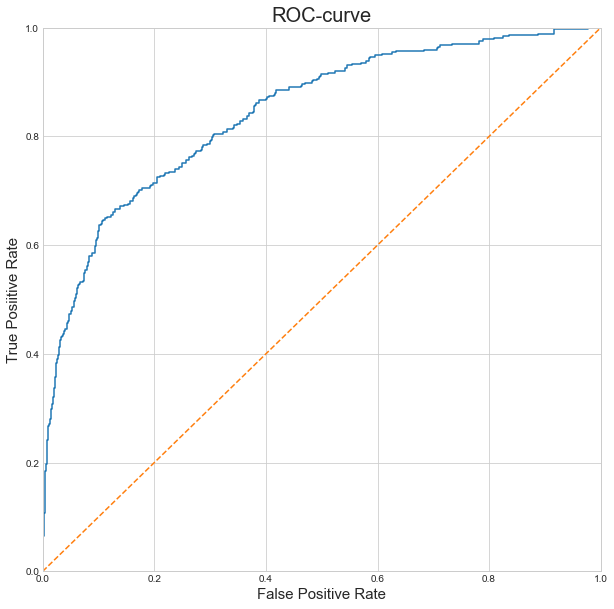

In [44]:
best_model.fit(features_upsampled, target_upsampled)

probabilities_test = best_model.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]

fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test)

plt.figure(figsize=(10,10))
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate', fontsize=15)
plt.ylabel('True Posiitive Rate', fontsize=15)
plt.title('ROC-curve', fontsize=20)
plt.show()

Выглядит не так уж и плохо для незнакомых для нашей модели данных.   
Теперь посмотрим на метрику AUC-ROC.

In [45]:
print('AUC-ROC', roc_auc_score(target_test, probabilities_one_test))

AUC-ROC 0.8426752770941657


Получили достаточно хорошие результаты на тестовой выборке, AUC-ROC больше 0.5, наша модель лучше случайной.   
Теперь посмотрим F1 score метрику

In [46]:
predicted_test = best_model.predict(features_test)
f1_score(target_test, predicted_test)

0.6084583901773534

И здесь результат нас удовлетворяет.   
Посмотрим на матрицу ошибок.

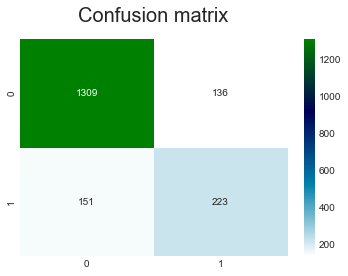

In [47]:
sns.heatmap(confusion_matrix(target_test, predicted_test),annot=True,fmt='3.0f',cmap="ocean_r")
plt.title('Confusion matrix', y=1.05, size=20);

Здесь так же видим хорошие результаты. Модель чаще предсказывает правильно как 0 так и 1.   
Посмотрим какие будут значения точности константной модели и сравним её с нашей.

In [48]:
target_const = target_test*0
acc_const = accuracy_score(target_test, target_const)
acc = accuracy_score(target_test, predicted_test)

print("Accuracy")
print('Model:', acc)
print("Constant:", acc_const)

Accuracy
Model: 0.8422210005497526
Constant: 0.794392523364486


И здесь наша модель выигрывает у константной.   
Осталось только сравнить соотношение ушедших клиентов в предсказанной и тестовой выборке.

In [49]:
print(f'Доля ушедших клиентов в предсказанных данных:, {predicted_test.mean():.1%}')
print(f'Доля ушедших клиентов в тестовых данных: {target_test.mean():.1%}')

Доля ушедших клиентов в предсказанных данных:, 19.7%
Доля ушедших клиентов в тестовых данных: 20.6%


Не плохой результат, менее 1% не удалось предсказать правильно.

## Общий вывод

Для прогнозирования оттока клиентов банка, можно использовать модель на основе алгоритма Случайного леса

Нам были предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. На основе этих данных мы сформировали признаки для обучения модели с целью прогнозирования оттока клиентов. Лучших результатов мы достигли с моделью на основе алгоритма Случайного леса на увеличенной обучающей выборке - **F1 мера - 0.60.**   
Лучшие параметры Случайного леса: *Количество деревьев: 50 Максимальная глубина: 12*   
Метрика AUC-ROC показала нам так же не плохой результат 0.84, что разумеется больше 0.5 для случайной модели. Так же наша модель лучше константной и чаще предсказывает правильно.   

Оносительно качества данных следует отметить наличие пропусков в столбце `Tenure` — сколько лет человек является клиентом банка, строки с которыми нам пришлость удалить, так как заменять их на 0 или любое другое значение будет не правильным. Так же в даннах имеетсся большой дисбаланс классов: 79.6% - остались с банком, а 20.4% ушли от банка. Можно было бы достичь лучшего качества модели, если бы данных было больше и баланс классов был близок 1 к 1. Об этом так же говорят результаты F1 метрики на увеличенной выборке.